In [2]:
import tensorflow as tf

In [0]:
from tensorflow import keras
import numpy as np  
import matplotlib.pyplot as plt

In [4]:
ClothData = keras.datasets.fashion_mnist #Mnist has gather data of clothes, we just used that data
(TestData, TestLabel) , (TrainData , TrainLabel) = ClothData.load_data() # Test Data nad Train Data has images while Train Labels and Test Labels has labels from 0 to 9

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
TrainData.shape

(10000, 28, 28)

In [6]:
TestData.shape 

(60000, 28, 28)

In [7]:
TrainLabel # train label has label from 0 to 9

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

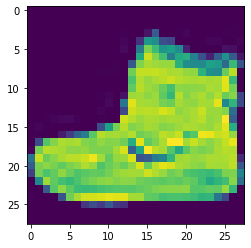

In [8]:
# let's check the first image of our testData
plt.figure()
plt.imshow(TestData[0])
plt.show()

In [0]:
#above image looks like an image of a shoes, and pixels values are ranging from 0 - 255
# Now 1 thing to be noted that labels are in integer, so we will assign each label with its class Name in respective order
ClothName = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#now scale pixels values from 0 - 1, for that divided it by 255
TrainData = TrainData/255
TestData = TestData/255

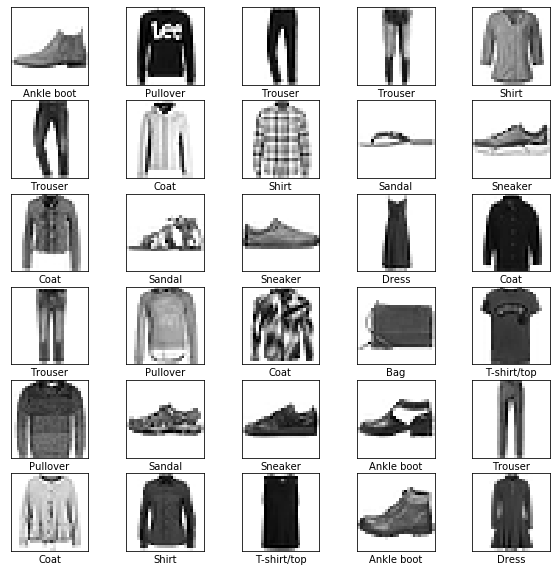

In [10]:
#now Let's again plot first 30 images of TrainData and polt them with their Colth's name, to verify that it is in correct order
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(TrainData[i], cmap=plt.cm.binary)
    plt.xlabel(ClothName[TrainLabel[i]])
plt.show()

In [11]:
# It's Verify that our Data is correct, Now Let's Train pur Model
ClothModel = keras.Sequential([
                               keras.layers.Flatten(input_shape = (28,28)), # as we have seen our data is in 28,28
                               keras.layers.Dense(128,activation='relu'),
                               keras.layers.Dense(10,activation = 'softmax')
])
ClothModel.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
ClothModel.fit(TrainData,TrainLabel,epochs = 10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 1s 117us/sample - loss: 0.7321 - acc: 0.7432
Epoch 2/10
10000/10000 [==============================] - 1s 86us/sample - loss: 0.5133 - acc: 0.8204
Epoch 3/10
10000/10000 [==============================] - 1s 85us/sample - loss: 0.4579 - acc: 0.8373
Epoch 4/10
10000/10000 [==============================] - 1s 83us/sample - loss: 0.4235 - acc: 0.8511
Epoch 5/10
10000/10000 [==============================] - 1s 80us/sample - loss: 0.3997 - acc: 0.8586
Epoch 6/10
10000/10000 [==============================] - 1s 80us/sample - loss: 0.3811 - acc: 0.8601
Epoch 7/10
10000/10000 [==============================] - 1s 79us/sample - loss: 0.3516 - acc: 0.8701
Epoch 8/10
10000/10000 [==============================] - 1s 82us/sample - loss: 0.3387 - acc: 0.8810
Epoch 9/10
10000/10000 [==============================] - 1s 83us/sample - loss

In [12]:
#accuracy is 88% with TrainData, let's check it with Test Data, and evaluate accuaracy with unseen Data
loss , accuracy = ClothModel.evaluate(TestData,TestLabel,verbose=2)


60000/60000 - 2s - loss: 0.3896 - acc: 0.8607


In [31]:
# Test Accuracy is less than the Train Accuracy, It means oue model is less confident for unseen data
# Now Let's Test it for a single Image and evaluate our Model.
# and use our Train Model for check it on single Image
# as I have no other image now, so i am testing it with image randomly pick from test Data
index = np.random.randint(0,10000)
img = TestData[index]
img = (np.expand_dims(img,0)) # we must add image to a list bcz our flatter layers accept data in a list
print(img.shape)

(1, 28, 28)


In [0]:
result = ClothModel.predict(img)

In [33]:
print(result)

[[4.8699771e-04 1.6821406e-04 2.6890519e-01 1.9128018e-03 6.6606486e-01
  6.1902319e-09 6.0911901e-02 1.3121648e-07 1.5499266e-03 2.2274559e-10]]


In [34]:
#It returns list of labels and correct answer would be max value of this list
correctResult = np.argmax(result)
correctResult

4

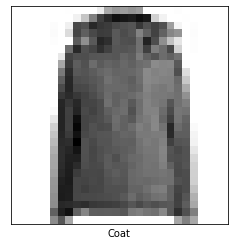

In [35]:
# let's plot that image in graph and check whether our result is accurate or not
plt.figure()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(TestData[index], cmap = plt.cm.binary) # plot original image with predicted result
plt.xlabel(ClothName[correctResult])
plt.show()